In [1]:
import numpy as np
from ctapipe.instrument import CameraGeometry
from ctapipe.image.toymodel import obtain_time_image, WaveformModel, Gaussian
from ctapipe.visualization import CameraDisplay
from scipy.stats import norm
import astropy.units as u
from matplotlib import pyplot as plt

In [12]:
geom = CameraGeometry.from_name('CHEC')

ref_duration = 67
n_ref_samples = 100
pulse_sigma = 3
ref_x_norm = np.linspace(0, ref_duration, n_ref_samples)
ref_y_norm = norm.pdf(ref_x_norm, ref_duration/2, pulse_sigma)

geom.reference_pulse_shape = ref_y_norm
geom.reference_pulse_step = u.Quantity(ref_x_norm[1] - ref_x_norm[0], u.ns)
geom.sampling_rate = u.Quantity(2, u.GHz)

centroid_x = u.Quantity(0.05, u.m)
centroid_y = u.Quantity(0.05, u.m)
length = u.Quantity(0.03, u.m)
width = u.Quantity(0.008, u.m)
psi = u.Quantity(70, u.deg)
time_gradient = u.Quantity(50, u.ns/u.m)
time_intercept = u.Quantity(20, u.ns)

Sampling rate is not in file, defaulting to 1.0 GHz
Reference pulse shape is not in file, defaulting None
Reference pulse shape step is not in file, default: 1.0 ns


In [13]:
_, charge, _ = Gaussian(
    x=centroid_x, y=centroid_y, width=width,
    length=length, psi=psi
).generate_image(geom, 10000)
time = obtain_time_image(
    geom.pix_x, geom.pix_y, centroid_x, centroid_y, psi, time_gradient, time_intercept
)

In [14]:
waveform_model = WaveformModel.from_camera(geom)
waveform = waveform_model.get_waveform(charge, time, 96)

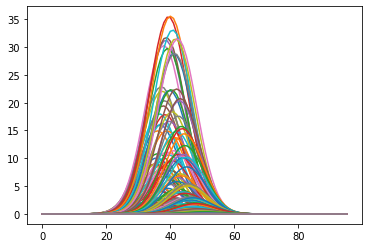

In [16]:
_ = plt.plot(waveform.T)

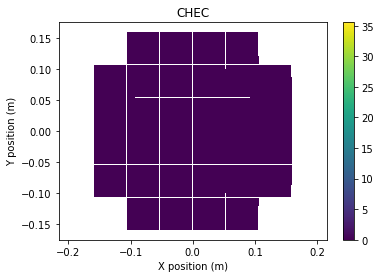

In [19]:
n_pixels, n_samples = waveform.shape
display = CameraDisplay(geom)
display.set_limits_minmax(0, waveform.max())
display.add_colorbar()
for i in range(n_samples):
    display.image = waveform[:, i]
    plt.savefig(f"images/i{i:03d}.png")